In [11]:
import os 
import os.path
import re 
from collections import defaultdict
from dna_features_viewer import GraphicFeature, GraphicRecord, CircularGraphicRecord, BiopythonTranslator
from BCBio import GFF
from Bio import SeqIO

In [100]:

def iter_filenames(folder, mask=''):
    """ iter over files in folder. Return file name path."""
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            if re.search(mask, name):
                apath = os.path.join(root, name)
                yield apath


In [101]:
filepath2target = defaultdict(str)
filepath2vulgar = defaultdict(list)
for filepath in iter_filenames("/mnt/students/spiders/genomes/ticks/", mask='_protein.exonerate'):
    with open(filepath) as fs:
        for line in fs:
            line = line.strip()
            if "Target:" in line:
                filepath2target[filepath] = " ".join(line.split())#[2:4])
            elif line.startswith("vulgar"):
                filepath2vulgar[filepath].append(line.split())
            else:
                continue
       

In [119]:
for filepath in iter_filenames("/mnt/students/spiders/genomes/spiders/", mask='_mRNA.exonerate'):
    with open(filepath) as fp:
        for line in fp:
            line = line.strip()
            if line.startswith("vulgar"):
                line = line.split()
                if line[1] == "AB218974.1":
                    if int(line[3]) - int(line[2]) > 2600:
                        print(filepath, line[0:10], sep = "\t")
                    else:
                        continue
                elif line[1] == "AF027972.1":
                    if int(line[3]) - int(line[2]) > 2816:
                        print(filepath, line[0:10])
                    else:
                        continue
                elif line[1] == "AM259067.1":
                    if int(line[3]) - int(line[2]) > 1182:
                        print(filepath, line[0:10])
                    else:
                        continue
                elif line[1] == "HM752570.1":
                    if int(line[3]) - int(line[2]) > 960:
                        print(filepath, line[0:10])
                    else:
                        continue
                elif line[1] == "HM752573.1":
                    if int(line[3]) - int(line[2]) > 1580:
                        print(filepath, line[0:10])
                    else:
                        continue
            else:
                continue



/mnt/students/spiders/genomes/spiders/Pardosa_pseudoannulata_mRNA.exonerate ['vulgar:', 'AM259067.1', '0', '1195', '+', 'SBLA01503156.1', '306052', '310007', '+', '2205']
/mnt/students/spiders/genomes/spiders/Pardosa_pseudoannulata_mRNA.exonerate ['vulgar:', 'HM752570.1', '10', '973', '+', 'SBLA01469463.1', '274537', '278737', '+', '1268']
/mnt/students/spiders/genomes/spiders/Pardosa_pseudoannulata_mRNA.exonerate ['vulgar:', 'AM259067.1', '0', '1195', '+', 'SBLA01469463.1', '274531', '278522', '+', '2124']
/mnt/students/spiders/genomes/spiders/Pardosa_pseudoannulata_mRNA.exonerate ['vulgar:', 'AM259067.1', '0', '1195', '+', 'SBLA01345031.1', '581073', '583864', '+', '2273']
/mnt/students/spiders/genomes/spiders/Pardosa_pseudoannulata_mRNA.exonerate ['vulgar:', 'AM259067.1', '2', '1190', '+', 'SBLA01341966.1', '3646', '452', '-', '1391']
/mnt/students/spiders/genomes/spiders/Pardosa_pseudoannulata_mRNA.exonerate ['vulgar:', 'HM752570.1', '10', '973', '+', 'SBLA01155144.1', '346968', '3

In [7]:
vul = {}
for key, value in filepath2vulgar.items():
    vul[key] = len(value)
    

In [8]:
vul1 = {}
vse = defaultdict(list)
for key, values in filepath2vulgar.items():
    for line in values:
        a = line
        if int(a[9]) > 100:
            vse[key].append(a)
        else:
            continue
#for i, a in vse.items():
    #vul1[i] =  len(a)

In [8]:
vul
    

{'/mnt/students/spiders/genomes/ticks/Platynothrus_peltifer_protein.exonerate': 1862,
 '/mnt/students/spiders/genomes/ticks/Tyrophagus_putrescentiae_protein.exonerate': 53949,
 '/mnt/students/spiders/genomes/ticks/Dermatophagoides_pteronyssinus_protein.exonerate': 4635,
 '/mnt/students/spiders/genomes/ticks/Dermatophagoides_farinae_protein.exonerate': 6306,
 '/mnt/students/spiders/genomes/ticks/Dinothrombium_tinctorium_protein.exonerate': 12077,
 '/mnt/students/spiders/genomes/ticks/Tetranychus_urticae_protein.exonerate': 16668,
 '/mnt/students/spiders/genomes/ticks/Sarcoptes_scabiei_protein.exonerate': 5526,
 '/mnt/students/spiders/genomes/ticks/Steganacarus_magnus_protein.exonerate': 1964,
 '/mnt/students/spiders/genomes/ticks/Varroa_jacobsoni_protein.exonerate': 29832,
 '/mnt/students/spiders/genomes/ticks/Rhipicephalus_microplus_protein.exonerate': 86941,
 '/mnt/students/spiders/genomes/ticks/Leptotrombidium_deliense_protein.exonerate': 6753,
 '/mnt/students/spiders/genomes/ticks/I

In [111]:
file2 = "/mnt/students/spiders/genomes/spiders/Loxosceles_reclusa_mRNA.exonerate"
with open(file) as fl:
    for line in fl:
        line = line.strip()
        if line.startswith("vulgar"):
            line = line.split()
            print(line)
        else:
            continue

['vulgar:', 'AB218974.1', '48', '202', '+', 'AZMS01S00000002.1', '27630', '27480', '-', '100', 'M', '13', '13', 'G', '1', '0', 'M', '19', '19', 'G', '0', '1', 'M', '12', '12', 'G', '1', '0', 'M', '15', '15', 'G', '1', '0', 'M', '12', '12', 'G', '1', '0', 'M', '1', '1', 'G', '3', '0', 'M', '9', '9', 'G', '1', '0', 'M', '9', '9', 'G', '0', '1', 'M', '22', '22', 'G', '0', '2', 'M', '3', '3', 'G', '2', '0', 'M', '22', '22', 'G', '0', '2', 'M', '7', '7']
['vulgar:', 'AF027972.1', '1831', '1881', '+', 'AZMS01S00000033.1', '120809', '120763', '-', '100', 'M', '16', '16', 'G', '2', '0', 'M', '1', '1', 'G', '1', '0', 'M', '5', '5', 'G', '1', '0', 'M', '24', '24']
['vulgar:', 'AM259067.1', '851', '928', '+', 'AZMS01S00000064.1', '24497', '24418', '-', '128', 'M', '7', '7', 'G', '1', '0', 'M', '16', '16', 'G', '0', '3', 'M', '2', '2', 'G', '1', '0', 'M', '5', '5', 'G', '0', '1', 'M', '32', '32', 'G', '0', '1', 'M', '5', '5', 'G', '1', '0', 'M', '7', '7']
['vulgar:', 'AF027972.1', '2181', '2420', 

['vulgar:', 'AB218974.1', '1309', '1493', '+', 'AZMS01S00085339.1', '12791', '12598', '-', '128', 'M', '9', '9', 'G', '0', '1', 'M', '10', '10', 'G', '0', '1', 'M', '23', '23', 'G', '3', '0', 'M', '8', '8', 'G', '0', '3', 'M', '2', '2', 'G', '1', '0', 'M', '9', '9', 'G', '0', '1', 'M', '4', '4', 'G', '0', '2', 'M', '9', '9', 'G', '0', '1', 'M', '10', '10', 'G', '3', '0', 'M', '1', '1', 'G', '2', '0', 'M', '8', '8', 'G', '0', '2', 'M', '8', '8', 'G', '1', '0', 'M', '11', '11', 'G', '1', '0', 'M', '13', '13', 'G', '0', '2', 'M', '5', '5', 'G', '0', '1', 'M', '25', '25', 'G', '0', '3', 'M', '5', '5', 'G', '0', '3', 'M', '13', '13']
['vulgar:', 'AB218974.1', '1822', '2006', '+', 'AZMS01S00085339.1', '12791', '12598', '-', '128', 'M', '9', '9', 'G', '0', '1', 'M', '10', '10', 'G', '0', '1', 'M', '23', '23', 'G', '3', '0', 'M', '8', '8', 'G', '0', '3', 'M', '2', '2', 'G', '1', '0', 'M', '9', '9', 'G', '0', '1', 'M', '4', '4', 'G', '0', '2', 'M', '9', '9', 'G', '0', '1', 'M', '10', '10', 'G',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['vulgar:', 'AB218974.1', '593', '903', '+', 'AZMS01S01040335.1', '10502', '10848', '+', '133', 'M', '10', '10', 'G', '1', '0', 'M', '15', '15', '3', '0', '2', 'I', '0', '28', '5', '0', '2', 'M', '10', '10', 'G', '2', '0', 'M', '12', '12', 'G', '2', '0', 'M', '21', '21', 'G', '0', '2', 'M', '6', '6', 'G', '1', '0', 'M', '13', '13', 'G', '3', '0', 'M', '4', '4', 'G', '5', '0', 'M', '24', '24', 'G', '2', '0', 'M', '3', '3', 'G', '3', '0', 'M', '12', '12', 'G', '0', '6', 'M', '5', '5', 'G', '0', '2', 'M', '3', '3', 'G', '0', '1', 'M', '1', '1', 'G', '0', '1', 'M', '16', '16', 'G', '1', '0', 'M', '15', '15', 'G', '0', '1', 'M', '6', '6', 'G', '1', '0', 'M', '1', '1', 'G', '4', '0', 'M', '13', '13', 'G', '2', '0', 'M', '12', '12', 'G', '0', '3', 'M', '19', '19', 'G', '0', '5', 'M', '8', '8', 'G', '0', '4', 'M', '11', '11', 'G', '0', '1', 'M', '5', '5', 'G', '0', '2', 'M', '7', '7', 'G', '1', '0', 'M', '10', '10', 'G', '0', '3', 'M', '5', '5', 'G', '1', '0', 'M', '10', '10', 'G', '0', '2', '

['vulgar:', 'AB218974.1', '279', '438', '+', 'AZMS01S00890238.1', '3314', '3151', '-', '140', 'M', '19', '19', 'G', '1', '0', 'M', '2', '2', 'G', '1', '0', 'M', '16', '16', 'G', '2', '0', 'M', '5', '5', 'G', '0', '2', 'M', '43', '43', 'G', '0', '1', 'M', '17', '17', 'G', '0', '4', 'M', '38', '38', 'G', '0', '1', 'M', '15', '15']
['vulgar:', 'AF027972.1', '569', '668', '+', 'AZMS01S00890217.1', '3609', '3511', '-', '102', 'M', '10', '10', 'G', '0', '1', 'M', '3', '3', 'G', '2', '0', 'M', '12', '12', 'G', '0', '1', 'M', '6', '6', 'G', '1', '0', 'M', '20', '20', 'G', '0', '1', 'M', '13', '13', 'G', '1', '0', 'M', '31', '31']
['vulgar:', 'AB218974.1', '153', '273', '+', 'AZMS01S00890144.1', '446', '326', '-', '114', 'M', '13', '13', 'G', '0', '2', 'M', '5', '5', 'G', '0', '2', 'M', '9', '9', 'G', '2', '0', 'M', '17', '17', 'G', '2', '0', 'M', '8', '8', 'G', '1', '0', 'M', '11', '11', 'G', '1', '0', 'M', '27', '27', 'G', '0', '1', 'M', '2', '2', 'G', '0', '1', 'M', '10', '10', 'G', '0', '1'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['vulgar:', 'HM752570.1', '226', '485', '+', 'AZMS01S00124637.1', '67708', '68002', '+', '128', 'M', '6', '6', 'G', '1', '0', 'M', '13', '13', 'G', '1', '0', 'M', '6', '6', 'G', '1', '0', 'M', '11', '11', '3', '0', '2', 'I', '0', '47', '5', '0', '2', 'M', '19', '19', 'G', '1', '0', 'M', '3', '3', 'G', '1', '0', 'M', '14', '14', 'G', '2', '0', 'M', '3', '3', 'G', '1', '0', 'M', '10', '10', 'G', '0', '1', 'M', '3', '3', 'G', '3', '0', 'M', '38', '38', 'G', '1', '0', 'M', '10', '10', 'G', '0', '1', 'M', '11', '11', 'G', '4', '0', 'M', '18', '18', 'G', '0', '1', 'M', '42', '42', 'G', '3', '0', 'M', '33', '33']
['vulgar:', 'HM752570.1', '600', '664', '+', 'AZMS01S00124630.1', '30138', '30069', '-', '112', 'M', '11', '11', 'G', '1', '0', 'M', '4', '4', 'G', '0', '1', 'M', '13', '13', 'G', '0', '1', 'M', '10', '10', 'G', '0', '2', 'M', '3', '3', 'G', '0', '2', 'M', '22', '22']
['vulgar:', 'HM752573.1', '754', '786', '+', 'AZMS01S00124614.1', '28166', '28130', '-', '101', 'M', '10', '10', 'G',

['vulgar:', 'AB218974.1', '13', '96', '+', 'AZMS01S00110308.1', '83152', '83227', '+', '107', 'M', '19', '19', 'G', '2', '0', 'M', '8', '8', 'G', '1', '0', 'M', '11', '11', 'G', '2', '0', 'M', '4', '4', 'G', '5', '0', 'M', '5', '5', 'G', '0', '1', 'M', '14', '14', 'G', '0', '1', 'M', '12', '12']
['vulgar:', 'HM752573.1', '258', '472', '+', 'AZMS01S00110265.1', '3153', '3347', '+', '131', 'M', '23', '23', 'G', '0', '3', 'M', '11', '11', 'G', '0', '1', 'M', '6', '6', 'G', '4', '0', 'M', '6', '6', 'G', '2', '0', 'M', '22', '22', 'G', '0', '1', 'M', '1', '1', 'G', '0', '2', 'M', '11', '11', 'G', '3', '0', 'M', '10', '10', 'G', '1', '0', 'M', '6', '6', 'G', '1', '0', 'M', '3', '3', 'G', '2', '0', 'M', '2', '2', 'G', '7', '0', 'M', '5', '5', 'G', '3', '0', 'M', '9', '9', 'G', '4', '0', 'M', '15', '15', 'G', '0', '1', 'M', '2', '2', 'G', '3', '0', 'M', '10', '10', 'G', '0', '2', 'M', '23', '23', 'G', '2', '0', 'M', '9', '9', 'G', '0', '2', 'M', '8', '8']
['vulgar:', 'AM259067.1', '4', '120', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
for i, g in vse.items():
    print(i)
    for h in g:
        print(h[5])

/mnt/projects/shared/taar_test/GCF_000700745.1_ASM70074v1_genomic.taar6.exn
NW_010301942.1
NW_010311379.1
/mnt/projects/shared/taar_test/GCF_000002265.2_Rn_Celera_genomic.taar6.exn
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
AC_000069.1
/mnt/projects/shared/taar_test/GCF_001715985.3_ASM171598v3_genomic.taar6.exn
NW_021940604.1
/mnt/projects/shared/taar_test/GCF_007364275.1_fArcCen1_genomic.taar6.exn
NC_044346.1
NC_044366.1
NC_044369.1
NC_044369.1
NC_044369.1
NC_044369.1
NC_044366.1
/mnt/projects/shared/taar_test/GCF_901001165.1_fSalTru1.1_genomic.taar6.exn
NC_042957.1
NC_042957.1
NC_042957.1
NC_042961.1
NC_042968.1
NC_042974.1
NC_042975.1
NC_042976.1
NC_042976.1
NC_042976.1
NC_042976.1
NC_042976.1
NC_042991.1
NC_042991.1
NC_042976.1
NC_042976.1
NC_042976.1
NC_042976.1
NC_042976.1
/mnt/projects/shared/taar_test/GCF_009828535.2_HMol_V2_genomic.taar6.exn
NW_022611644.1
NW_022611644.1
NW_022611644.1
/mnt/projects/s

In [92]:
mRNA_id_list = {}
file = "/mnt/students/spiders/genomes/spiders/Acanthoscurria_geniculata_mRNA.exonerate"
with open(file) as fl:
    for line in fl:
        line = line.strip()
        if line.startswith("vulgar"):
            line = line.split()
            if line[1] not in mRNA_id_list.keys():
                mRNA_id_list[line[1]] = 0
            else:
                mRNA_id_list[line[1]] += 1
            #print(line[1])
        else:
            continue

In [93]:
mRNA_id_list

{'AB218974.1': 53220,
 'AF027972.1': 14696,
 'AM259067.1': 10612,
 'HM752570.1': 25921,
 'HM752573.1': 16900}

In [75]:
###protein exonerate filter
file = "/mnt/students/spiders/genomes/ticks/Dermanyssus_gallinae_protein.exonerate"
with open(file) as fl:
    for line in fl:
        line = line.strip()
        if line.startswith("vulgar"):
            line = line.split()
            if line[1] == "ABR68856.1":
                if int(line[3]) - int(line[2]) > 3000:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "AAC38846.1":
                if int(line[3]) - int(line[2]) > 800:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "ACF19411.1":
                if int(line[3]) - int(line[2]) > 200:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "ADM14321.1":
                if int(line[3]) - int(line[2]) > 300:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "CAJ90517.1":
                if int(line[3]) - int(line[2]) > 350:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "ADM14324.1" or line[1] == "ACF19412.1" or line[1] == "ACF19413.1":
                if int(line[3]) - int(line[2]) > 250:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "AAZ15322.1":
                if int(line[3]) - int(line[2]) > 2000:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "ABD24294.1":
                if int(line[3]) - int(line[2]) > 220:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "BAE54451.1":
                if int(line[3]) - int(line[2]) > 720:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "AMK48677.1":
                if int(line[3]) - int(line[2]) > 780:
                    print(line[0:10])
                else:
                    continue
        else:
            continue

['vulgar:', 'BAE54451.1', '4', '753', '.', 'QVRM01004960.1', '272365', '267864', '-', '380']
['vulgar:', 'BAE54451.1', '18', '753', '.', 'QVRM01003284.1', '841617', '586249', '-', '502']
['vulgar:', 'BAE54451.1', '13', '750', '.', 'QVRM01003284.1', '837336', '77558', '-', '359']
['vulgar:', 'BAE54451.1', '3', '753', '.', 'QVRM01003284.1', '839229', '836985', '-', '354']
['vulgar:', 'BAE54451.1', '3', '746', '.', 'QVRM01003284.1', '838839', '836619', '-', '349']
['vulgar:', 'BAE54451.1', '5', '753', '.', 'QVRM01003284.1', '840891', '838332', '-', '332']
['vulgar:', 'CAJ90517.1', '16', '380', '.', 'QVRM01003284.1', '636839', '75007', '-', '195']


In [110]:
## mRNA filter!!!
file1 = "/mnt/students/spiders/genomes/spiders/Latrodectus_hesperus_mRNA.exonerate"
with open(file1) as f1:
    for line in f1:
        line = line.strip()
        if line.startswith("vulgar"):
            line = line.split()
            if line[1] == "AB218974.1":
                if int(line[3]) - int(line[2]) > 2600:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "AF027972.1":
                if int(line[3]) - int(line[2]) > 2816:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "AM259067.1":
                if int(line[3]) - int(line[2]) > 1182:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "HM752570.1":
                if int(line[3]) - int(line[2]) > 960:
                    print(line[0:10])
                else:
                    continue
            elif line[1] == "HM752573.1":
                if int(line[3]) - int(line[2]) > 1580:
                    print(line[0:10])
                else:
                    continue
        else:
            continue

['vulgar:', 'AM259067.1', '1', '1187', '+', 'KZ629412.1', '42281', '44752', '+', '1314']


In [79]:
Dermanyssus_gallinae = [
    GraphicFeature(start=77558, end=837336, strand=1, color="#D2691E", label="BAE54451.1"),
    GraphicFeature(start=75007, end=636839, strand=1, color="#cffccc", label="CAJ90517.1"),
    GraphicFeature(start=838332, end=840891, strand=1, color="#ffd700", label="BAE54451.1"),
    GraphicFeature(start=836619, end=838839, strand=1, color="#9ACD32", label="BAE54451.1")


]
record = GraphicRecord(sequence_length=863382, features=Dermanyssus_gallinae)
record.plot(figure_width = 7)



(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c232b5c10>,
 ({GF(BAE54451.1, 77558-837336 (1)): 0,
   GF(CAJ90517.1, 75007-636839 (1)): 1.0,
   GF(BAE54451.1, 838332-840891 (1)): 0,
   GF(BAE54451.1, 836619-838839 (1)): 1.0},
  {GF(BAE54451.1, 838332-840891 (1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(BAE54451.1, 836619-838839 (1)): {'feature_y': 1.0,
    'annotation_y': 3.0}}))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7bf5bacc70>,
 ({GF(CAJ90517.1, 716074-1135399 (1)): 0},
  {GF(CAJ90517.1, 716074-1135399 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

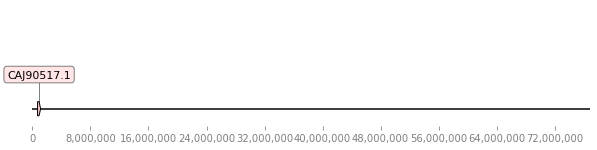

In [141]:
Galendromus_occidentalis = [
    GraphicFeature(start=716074, end=1135399, strand=+1, color="#ffcccc", label="CAJ90517.1")]

record = GraphicRecord(sequence_length= 76898487, features=Galendromus_occidentalis)
record.plot(figure_width = 10)



(<matplotlib.axes._subplots.AxesSubplot at 0x7f7bf58768b0>,
 ({GF(BAE54451.1, 14229731-14231925 (1)): 0,
   GF(BAE54451.1, 12525446-12527670 ): 0},
  {GF(BAE54451.1, 12525446-12527670 ): {'feature_y': 0, 'annotation_y': 2.0},
   GF(BAE54451.1, 14229731-14231925 (1)): {'feature_y': 0,
    'annotation_y': 1.0}}))

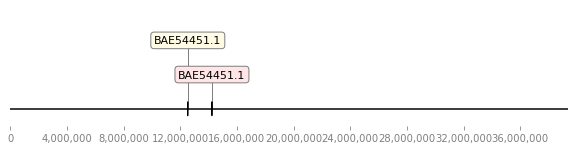

In [151]:
Varroa_destructor1 = [
    GraphicFeature(start=14229731, end=14231925, strand=+1, color="#ffcccc", label="BAE54451.1"),
    GraphicFeature(start=12525446, end=12527670, strand=+1, color="#ffd700", label="BAE54451.1")
]
record1 = GraphicRecord(sequence_length=39399627, features=Varroa_destructor1)
record1.plot(figure_width = 10)

Varrow_destructor2 = [ 
    GraphicFeature(start=14229731, end=14231925, strand=+1, color="#ffcccc", label="BAE54451.1"),
    GraphicFeature(start=12525446, end=12527670, strad=+1, color="#ffd700", label="BAE54451.1")
]
    
record2=GraphicRecord(sequence_length=39399627, features=Varrow_destructor2)    
record2.plot(figure_width = 10)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7bf57e99a0>,
 ({GF(CAJ90517.1, 15061-126321 (1)): 0}, {}))

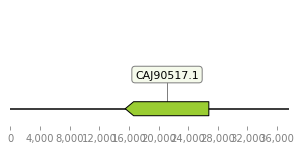

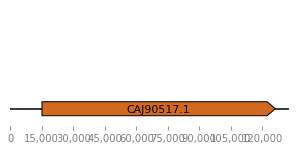

In [158]:
Tyrophagus_putrescentiae = [
    GraphicFeature(start=9408, end=10140, strand=+1, color="#ffd700", label="ACF19411.1"),
    GraphicFeature(start=9195, end=10131, strand=+1, color="#9ACD32", label="ACF19411.1"),
]
record1 = GraphicRecord(sequence_length =26434, features = Tyrophagus_putrescentiae)
record1.plot(figure_width=5)
    
Tyrophagus_putrescentiae2 = [
    
    GraphicFeature(start=26786, end=15498, strand=+1, color="#9ACD32", label="CAJ90517.1" )
]
record2 = GraphicRecord(sequence_length=37659, features = Tyrophagus_putrescentiae2)
record2.plot(figure_width=5)

Tyrophagus_putrescentiae3 = [
    GraphicFeature(start=43532, end=3493, strand=+1, color="#DC143C", label="ACF19411.1")
]
record3 = GraphicRecord(sequence_length = 49890, features = Tyrophagus_putrescentiae3)
record3.plot(figure_width = 5)
 
Tyrophagus_putrescentiae4 = [
    GraphicFeature(start = 15061, end = 126321, strand=+1, color="#D2691E", label="CAJ90517.1")
]
record4 = GraphicRecord(sequence_length = 132970, features = Tyrophagus_putrescentiae4)
record4.plot(figure_width = 5)

In [83]:
Tropilaelaps_mercedesae = [
    GraphicFeature(start=21879, end=22668, strand=+1, color="#ffd700", label="ACF19413.1"),
    GraphicFeature(start=21855, end=22617, strand=+1, color="#cffccc", label="ACF19413.1"),
    GraphicFeature(start=21852, end=22620, strand=+1, color="#FF0000", label="ACF19413.1"),
    GraphicFeature(start=21846, end=22629, strand=+1, color="#808000", label="ACF19413.1"),
    GraphicFeature(start=21870, end=22668, strand=+1, color="#00FFFF", label="ACF19413.1"),
    GraphicFeature(start=21867, end=22644, strand=+1, color="#FF00FF", label="ACF19413.1")
]
record = CircularGraphicRecord(sequence_length = 24590, features = Tropilaelaps_mercedesae)
record.plot(figure_width = 5)

Tropilaelaps_mercedesae2 = [
    GraphicFeature(start = 1596, end = 34113, strand=+1, color="#FF0000", label="CAJ90517.1")
]
record1 = GraphicRecord(sequence_length = 79406, features=Tropilaelaps_mercedesae2)
record1.plot(figure_width= 5)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c216ac220>,
 ({GF(CAJ90517.1, 1596-34113 (1)): 0}, {}))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c2173aa30>,
 ({GF(ACF19413.1, 2266-1482 (1)): 0},
  {GF(ACF19413.1, 2266-1482 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

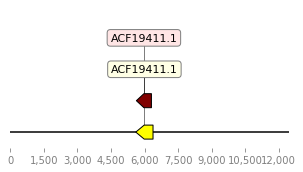

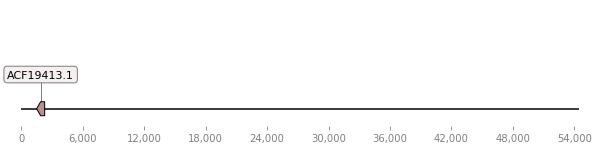

In [85]:
Rhipicephalus_microplus = [
    GraphicFeature(start=6306, end=5634, strand=+1, color="#800000", label="ACF19411.1"),
    GraphicFeature(start=6378, end=5607, strand=+1, color="#FFFF00", label="ACF19411.1")
]
record = GraphicRecord(sequence_length=12474, features=Rhipicephalus_microplus)
record.plot(figure_width=5)

Rhipicephalus_microplus2 = [
    GraphicFeature(start=2266, end=1482, strand=+1, color="#BC8F8F", label="ACF19413.1")
]
record2 = GraphicRecord(sequence_length= 54506, features = Rhipicephalus_microplus2)
record2.plot(figure_width=10)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c239c3850>,
 ({GF(ACF19413.1, 284181-283335 ): 0,
   GF(ACF19413.1, 284154-283331 (1)): 1.0,
   GF(ACF19413.1, 242715-241905 (1)): 0},
  {GF(ACF19413.1, 284181-283335 ): {'feature_y': 0, 'annotation_y': 2.0},
   GF(ACF19413.1, 284154-283331 (1)): {'feature_y': 1.0, 'annotation_y': 3.0},
   GF(ACF19413.1, 242715-241905 (1)): {'feature_y': 0, 'annotation_y': 4.0}}))

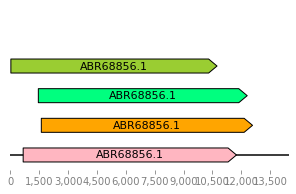

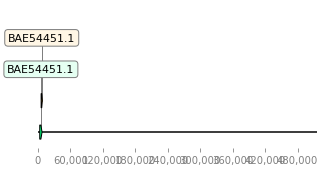

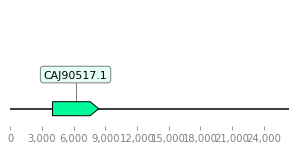

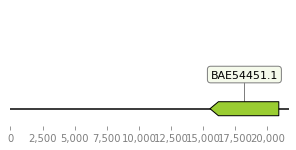

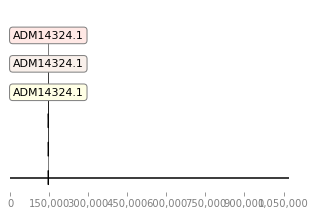

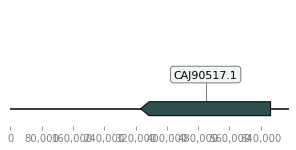

In [18]:
## SPIDERS!!

Haemaphysalis_longicornis = [
    GraphicFeature(start=1453, end=12307, strand=+1, color="#00FF7F", label="ABR68856.1"),
    GraphicFeature(start=665, end=11750,  strand=+1, color="#FFB6C1", label="ABR68856.1"),
    GraphicFeature(start=1608, end=12584, strand=+1, color="#FFA500", label="ABR68856.1"),
    GraphicFeature(start=26, end=10739, strand=+1, color="#9ACD32", label="ABR68856.1")
]
record=GraphicRecord(sequence_length=14498, features = Haemaphysalis_longicornis)
record.plot(figure_width=5)
Haemaphysalis_longicornis2 = [
    GraphicFeature(start=3179, end=7445, strand=+1, color="#00FF7F", label="BAE54451.1" ),
    GraphicFeature(start=5790, end=7983, strand=+1, color="#FFA500", label="BAE54451.1" ),      
]
record2=GraphicRecord(sequence_length=516097 , features = Haemaphysalis_longicornis2)
record2.plot(figure_width=5)

Haemaphysalis_longicornis3 = [
    GraphicFeature(start=3996, end=8363, strand=+1, color="#00FA9A", label="CAJ90517.1")
]
record3=GraphicRecord(sequence_length=26452 , features = Haemaphysalis_longicornis3)
record3.plot(figure_width=5)

Haemaphysalis_longicornis4 = [
    GraphicFeature(start=20886, end=15534, strand=1, color="#9ACD32", label="BAE54451.1")
]
record4=GraphicRecord(sequence_length=21709 , features = Haemaphysalis_longicornis4)
record4.plot(figure_width=5)

Haemaphysalis_longicornis5 = [
    GraphicFeature(start=145317, end=146095, strand=+1, color="#808000", label="ADM14324.1"),
    GraphicFeature(start=145308, end=146083, strand=+1, color="#FFE4E1", label="ADM14324.1"),
    GraphicFeature(start=145401, end=146179, strand=+1, color="#A0522D", label="ADM14324.1")
]
record4=GraphicRecord(sequence_length=1072570 , features = Haemaphysalis_longicornis5)
record4.plot(figure_width=5)

Haemaphysalis_longicornis6 = [
    GraphicFeature(start=665129, end=333042, strand=1, color="#2F4F4F", label="CAJ90517.1")
]
record6=GraphicRecord(sequence_length= 713154 , features = Haemaphysalis_longicornis6)
record6.plot(figure_width=5)

Haemaphysalis_longicornis7 = [
    GraphicFeature(start=547360, end=240826, strand=1, color="#DB7093", label="AAC38846.1")
]
                
record7=GraphicRecord(sequence_length= 1188286 , features = Haemaphysalis_longicornis7)
record7.plot(figure_width=5)

Haemaphysalis_longicornis8 = [
    GraphicFeature(start=284181, end=283335, sstrand=1, color="#CD5C5C", label="ACF19413.1"),
    GraphicFeature(start=284154, end=283331, strand=1, color="#FA8072", label="ACF19413.1"),
    GraphicFeature(start=242715, end=241905, strand=1, color="#E9967A", label="ACF19413.1")
]
                
record8=GraphicRecord(sequence_length = 1288617, features = Haemaphysalis_longicornis8)
record8.plot(figure_width=5)



(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c23832f70>,
 ({GF(ACF19411.1, 984-282 (1)): 0},
  {GF(ACF19411.1, 984-282 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

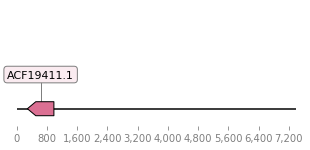

In [23]:

Acanthoscurria_geniculata = [
    GraphicFeature(start=984, end=282, strand=1, color="#DB7093", label="ACF19411.1")
]
                
record=GraphicRecord(sequence_length= 7385 , features = Acanthoscurria_geniculata)
record.plot(figure_width=5)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c2329bfa0>,
 ({GF(ACF19413.1, 1710-148 (1)): 3.0,
   GF(ADM14321.1, 1686-130 (1)): 5.0,
   GF(ACF19411.1, 1710-157 (1)): 6.0,
   GF(ADM14324.1, 1710-112 (1)): 1.0,
   GF(ABD24294.1, 1746-181 (1)): 2.0,
   GF(ACF19412.1, 1710-151 (1)): 4.0,
   GF(CAJ90517.1, 1710-103 (1)): 0},
  {GF(CAJ90517.1, 1710-103 (1)): {'feature_y': -0.11903827829115521,
    'annotation_y': 2.95},
   GF(ADM14324.1, 1710-112 (1)): {'feature_y': 0.05576074648458773,
    'annotation_y': 1.4500000000000002},
   GF(ABD24294.1, 1746-181 (1)): {'feature_y': 0.2122133521974232,
    'annotation_y': 1.9500000000000002},
   GF(ACF19413.1, 1710-148 (1)): {'feature_y': 0.40016569740624863,
    'annotation_y': 2.2},
   GF(ACF19412.1, 1710-151 (1)): {'feature_y': 0.5744750205142837,
    'annotation_y': 2.45},
   GF(ADM14321.1, 1686-130 (1)): {'feature_y': 0.7611505496904818,
    'annotation_y': 1.7000000000000002},
   GF(ACF19411.1, 1710-157 (1)): {'feature_y': 0.9226155632475492,

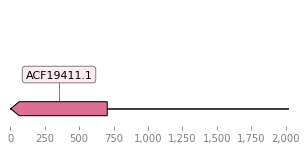

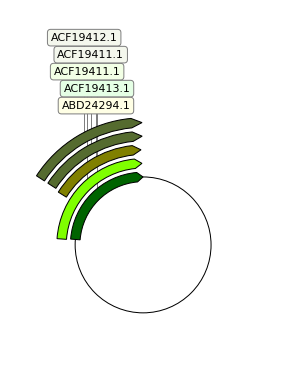

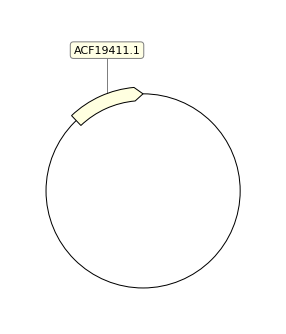

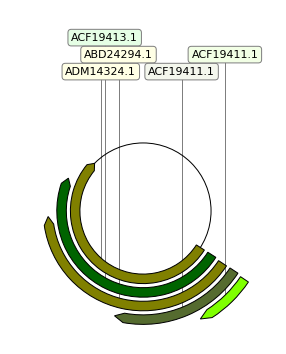

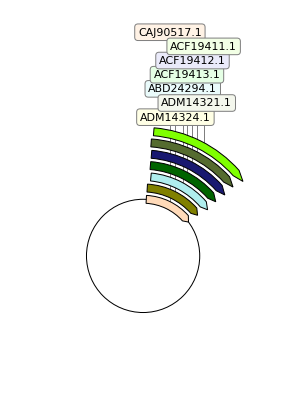

In [38]:
Anelosimus_studiosus = [
    GraphicFeature(start=704, end=3, strand=1, color="#DB7093", label="ACF19411.1")
]
                
record=GraphicRecord(sequence_length=  2026, features = Anelosimus_studiosus)
record.plot(figure_width=5)

Anelosimus_studiosus2 = [
    GraphicFeature(start=5482, end=7186, strand=+1, color="#006400", label="ACF19413.1"),
    GraphicFeature(start=6048, end=7177, strand=+1, color="#556B2F", label="ACF19411.1"),
    GraphicFeature(start=5473, end=7171, strand=+1, color="#7FFF00", label="ACF19411.1"),
    GraphicFeature(start=6048, end=7177, strand=+1, color="#556B2F", label="ACF19412.1"),
    GraphicFeature(start=6027, end=7162, strand=+1, color="#808000", label="ABD24294.1")
                 
]
                
record2 = CircularGraphicRecord(sequence_length=  7187  , features = Anelosimus_studiosus2)
record2.plot(figure_width=5)

Anelosimus_studiosus3= [
    GraphicFeature(start=7484, end=8513, strand=+1, color="#FFFFE0", label="ACF19411.1")
]
                
record3=CircularGraphicRecord(sequence_length= 8514, features = Anelosimus_studiosus3)
record3.plot(figure_width=5)

Anelosimus_studiosus4= [
    GraphicFeature(start=4021, end=9635, strand=+1, color="#006400", label="ACF19413.1"),
    GraphicFeature(start=4045, end=6406, strand=+1, color="#556B2F", label="ACF19411.1"),
    GraphicFeature(start=4069, end=4990, strand=+1, color="#7FFF00", label="ACF19411.1"),   
    GraphicFeature(start=4048, end=8747, strand=+1, color="#808000", label="ABD24294.1"),
    GraphicFeature(start=4021, end=10317, strand=+1, color="#808000", label="ADM14324.1")                            
]
                
record4= CircularGraphicRecord(sequence_length= 11811 , features = Anelosimus_studiosus4)
record4.plot(figure_width=5)

Anelosimus_studiosus5= [
    GraphicFeature(start=1710, end=148, strand=1, color="#006400", label="ACF19413.1"),
    GraphicFeature(start=1686, end=130, strand=1, color="#556B2F", label="ADM14321.1"),
    GraphicFeature(start=1710, end=157, strand=1, color="#7FFF00", label="ACF19411.1"),   
    GraphicFeature(start=1710, end=112, strand=1, color="#808000", label="ADM14324.1"),
    GraphicFeature(start=1746, end=181, strand=1, color="#AFEEEE", label="ABD24294.1"),
    GraphicFeature(start=1710, end=151, strand=1, color="#191970", label="ACF19412.1"),
    GraphicFeature(start=1710, end=103, strand=1, color="#FFDAB9", label="CAJ90517.1") 
]
                
record5= CircularGraphicRecord(sequence_length= 11549 , features = Anelosimus_studiosus5)
record5.plot(figure_width=5)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c2bd8e880>,
 ({GF(ACF19413.1, 5466-542 (1)): 0,
   GF(ADM14321.1, 5451-527 (1)): 1.0,
   GF(ACF19411.1, 5475-1106 (1)): 5.0,
   GF(ABD24294.1',, 5478-575 (1)): 2.0,
   GF(ADM14324.1, 5475-4479 (1)): 7.0,
   GF(AAC38846.1, 5244-656 (1)): 4.0,
   GF(BAE54451.1, 5445-1154 (1)): 6.0,
   GF(ACF19412.1, 5460-566 (1)): 3.0},
  {GF(ACF19413.1, 5466-542 (1)): {'feature_y': -1.8698967187016726,
    'annotation_y': 2.9000000000000004},
   GF(ADM14321.1, 5451-527 (1)): {'feature_y': -2.0360248151993923,
    'annotation_y': 1.9000000000000001},
   GF(ABD24294.1',, 5478-575 (1)): {'feature_y': -2.2312019273989625,
    'annotation_y': 1.6500000000000001},
   GF(ACF19412.1, 5460-566 (1)): {'feature_y': -2.3980009745468838,
    'annotation_y': 3.1500000000000004},
   GF(AAC38846.1, 5244-656 (1)): {'feature_y': -2.5221718600715404,
    'annotation_y': 2.1500000000000004},
   GF(ACF19411.1, 5475-1106 (1)): {'feature_y': -2.930010574844494,
    'annotation_y

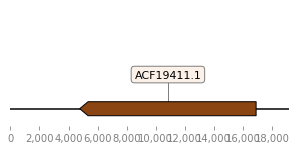

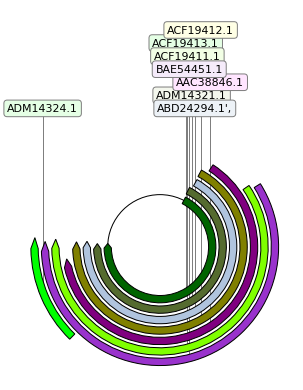

In [44]:
Dysdera_silvatica = [
    GraphicFeature(start=16909, end=4770, strand=1, color="#8B4513", label="ACF19411.1" )
]
record = GraphicRecord(sequence_length= 19198, features = Dysdera_silvatica)
record.plot(figure_width=5)


Dysdera_silvatica2 = [
    GraphicFeature(start=5466, end=542, strand=1, color="#006400", label="ACF19413.1"),
    GraphicFeature(start=5451, end=527, strand=1, color="#556B2F", label="ADM14321.1"),
    GraphicFeature(start=5475, end=1106, strand=1, color="#7FFF00", label="ACF19411.1"),
    GraphicFeature(start=5478, end=575, strand=1, color="#B0C4DE", label="ABD24294.1',"),
    GraphicFeature(start=5475, end=4479, strand=1, color="#00FF00", label="ADM14324.1"),
    GraphicFeature(start=5244, end=656, strand=1, color="#800080", label="AAC38846.1"),
    GraphicFeature(start=5445, end=1154, strand=1, color="#9932CC", label="BAE54451.1"),
    GraphicFeature(start=5460, end=566, strand=1, color="#808000", label="ACF19412.1")
]
                
record2 = CircularGraphicRecord(sequence_length=  7187  , features =Dysdera_silvatica2)
record2.plot(figure_width=5)


NameError: name 'GraphicReport' is not defined

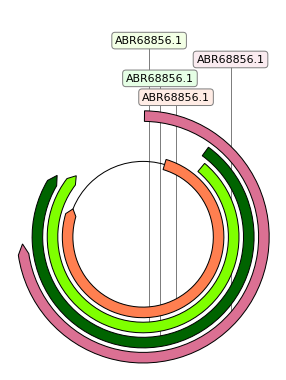

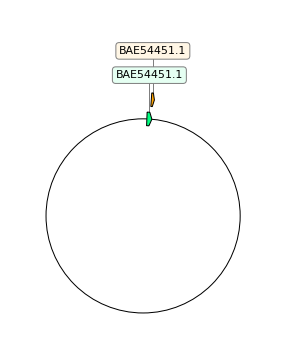

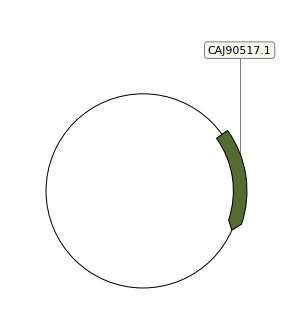

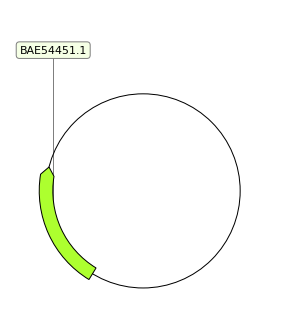

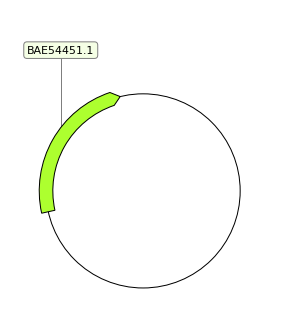

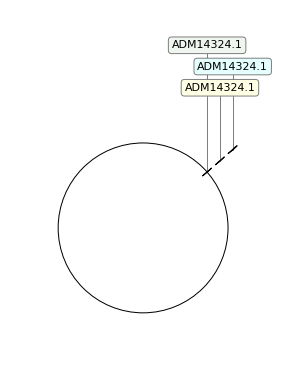

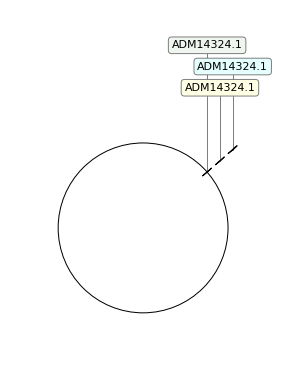

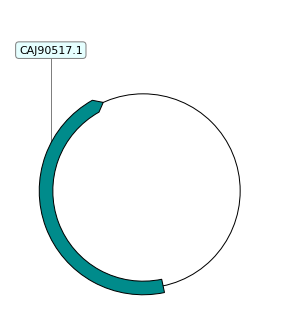

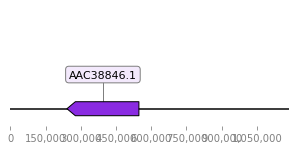

In [53]:
Haemaphysalis_longicornis = [
    GraphicFeature(start=1453, end=12307, strand=+1, color="#006400", label="ABR68856.1"),
    GraphicFeature(start=665, end=11750, strand=+1, color="#FF7F50", label="ABR68856.1"),
    GraphicFeature(start=1608, end=12584, strand=+1, color="#7FFF00", label="ABR68856.1"),   
    GraphicFeature(start=26, end=10739, strand=+1, color="#DB7093", label="ABR68856.1")      
]
                
record= CircularGraphicRecord(sequence_length= 14498  , features = Haemaphysalis_longicornis)
record.plot(figure_width=5)

Haemaphysalis_longicornis = [
   GraphicFeature(start=3179, end=7445, strand=+1, color="#FFE4C4", label="BAE54451.1"),
   GraphicFeature(start=5790, end=7983, strand=+1, color="#4682B4", label="BAE54451.1")  
]
record2= CircularGraphicRecord(sequence_length= 516097, features = Haemaphysalis_longicornis2)
record2.plot(figure_width=5)

Haemaphysalis_longicornis3 = [
   GraphicFeature(start=3996, end=8363, strand=+1, color="#556B2F", label="CAJ90517.1")  
]
record3= CircularGraphicRecord(sequence_length= 26452,features = Haemaphysalis_longicornis3)
record3.plot(figure_width=5)


Haemaphysalis_longicornis4 = [
   GraphicFeature(start=20886, end=15534, strand=+1, color="#ADFF2F", label="BAE54451.1")  
]
record4= CircularGraphicRecord(sequence_length= 26452,features = Haemaphysalis_longicornis4)
record4.plot(figure_width=5)

Haemaphysalis_longicornis5= [
   GraphicFeature(start=20886, end=15534, strand=1, color="#ADFF2F", label="BAE54451.1")  
]
record5=CircularGraphicRecord(sequence_length= 21709 , features = Haemaphysalis_longicornis5)
record5.plot(figure_width=5)


Haemaphysalis_longicornis6= [
    GraphicFeature(start=145317, end=146095, strand=+1, color="#8FBC8F", label="ADM14324.1"),
    GraphicFeature(start=145308, end=146083, strand=+1, color="#00FFFF", label="ADM14324.1"),
    GraphicFeature(start=145401, end=146179, strand=+1, color="#FFFF00", label="ADM14324.1"),
]
record6=CircularGraphicRecord(sequence_length=1072570 , features = Haemaphysalis_longicornis6)
record6.plot(figure_width=5)


Haemaphysalis_longicornis6= [
    GraphicFeature(start=145317, end=146095, strand=+1, color="#8FBC8F", label="ADM14324.1"),
    GraphicFeature(start=145308, end=146083, strand=+1, color="#00FFFF", label="ADM14324.1"),
    GraphicFeature(start=145401, end=146179, strand=+1, color="#FFFF00", label="ADM14324.1"),
]
record6=CircularGraphicRecord(sequence_length=1072570 , features = Haemaphysalis_longicornis6)
record6.plot(figure_width=5)

Haemaphysalis_longicornis7= [
   GraphicFeature(start=665129, end=333042 , strand=1, color="#008B8B", label='CAJ90517.1')
]
record7= CircularGraphicRecord(sequence_length=713154 , features = Haemaphysalis_longicornis7)
record7.plot(figure_width=5)

Haemaphysalis_longicornis8 = [
    GraphicFeature(start=547360, end=240826, strand=1, color="#8A2BE2", label='AAC38846.1')
]
record8=GraphicRecord(sequence_length =  1188286, features = Haemaphysalis_longicornis8)
record8.plot(figure_width=5)

Haemaphysalis_longicornis9 = [
    GraphicFeature(start=284181, end=283335, strand=1, color="#FF0000", label='ACF19413.1'),
    GraphicFeature(start=284154, end=283371, strand=1, color="#FFD700", label='ACF19413.1')
]
record9 = GraphicReport(sequence_length =   1288617 , features = Haemaphysalis_longicornis9)
record.plot(figure_width = 5)

Haemaphysalis_longicornis10 = [ 
    GraphicFeature(start=242715, end=241905, strand=1, color="#CD5C5C", label='ACF19413.1')  
]
record10 = GraphicRecord(sequence_lngth = 1788685, features = Haemaphysalis_longicornis10)
record.plot(figure_width)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c2180e4f0>,
 ({GF(ACF19413.1, 42295-44338 (1)): 5.0,
   GF(ACF19411.1, 42295-44473 (1)): 3.0,
   GF(ACF19412.1, 42295-44632 (1)): 1.0,
   GF(CAJ90517.1, 42295-44752 (1)): 0,
   GF(ADM14324.1, 42295-44191 (1)): 6.0,
   GF(ABD24294.1, 42256-44524 (1)): 2.0,
   GF(ADM14321.1, 42319-44488 (1)): 4.0},
  {GF(CAJ90517.1, 42295-44752 (1)): {'feature_y': -1.994721089427499,
    'annotation_y': 2.95},
   GF(ACF19412.1, 42295-44632 (1)): {'feature_y': -2.194204122861601,
    'annotation_y': 2.2},
   GF(ABD24294.1, 42256-44524 (1)): {'feature_y': -2.393970216126859,
    'annotation_y': 1.9500000000000002},
   GF(ACF19411.1, 42295-44473 (1)): {'feature_y': -2.593175005742352,
    'annotation_y': 2.7},
   GF(ADM14321.1, 42319-44488 (1)): {'feature_y': -2.792078573239755,
    'annotation_y': 1.7000000000000002},
   GF(ACF19413.1, 42295-44338 (1)): {'feature_y': -2.9923720611182114,
    'annotation_y': 2.45},
   GF(ADM14324.1, 42295-44191 (1)): {'feature

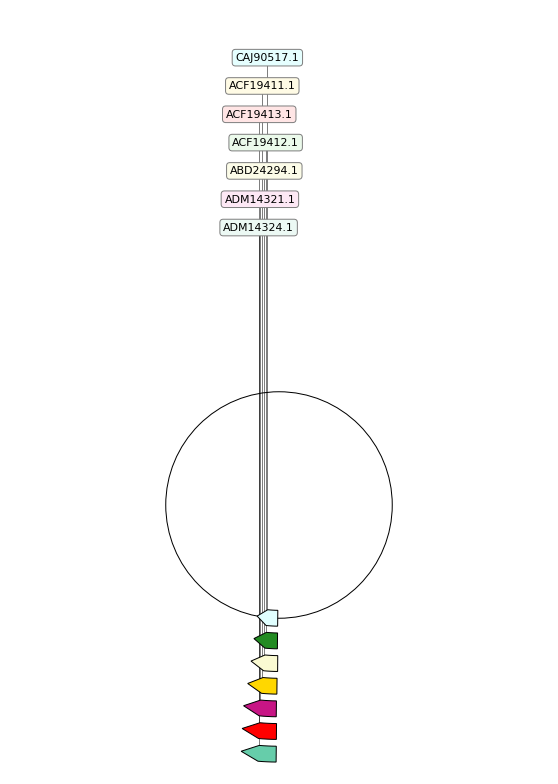

In [84]:
Latrodectus_hesperus = [
    GraphicFeature(start=42295, end=44338, strand=+1, color="#FF0000", label='ACF19413.1'),
    GraphicFeature(start=42295, end=44473, strand=+1, color="#FFD700", label='ACF19411.1'),
    GraphicFeature(start=42295, end=44632, strand=+1, color="#228B22", label='ACF19412.1'),
    GraphicFeature(start=42295, end=44752, strand=+1, color="#E0FFFF", label='CAJ90517.1'),
    GraphicFeature(start=42295, end=44191, strand=+1, color="#66CDAA", label='ADM14324.1'),
    GraphicFeature(start=42256, end=44524, strand=+1, color="#FAFAD2", label='ABD24294.1'),
    GraphicFeature(start=42319, end=44488, strand=+1, color="#C71585", label='ADM14321.1')
]
record = CircularGraphicRecord(sequence_length =84288, features = Latrodectus_hesperus)
record.plot(figure_width=10)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c239f4c70>,
 ({GF(BAE54451.1, 3179-7445 (1)): 0, GF(BAE54451.1, 5790-7983 (1)): 1.0},
  {GF(BAE54451.1, 3179-7445 (1)): {'feature_y': -0.0020900183778125303,
    'annotation_y': 0.45},
   GF(BAE54451.1, 5790-7983 (1)): {'feature_y': 0.19578567535034264,
    'annotation_y': 0.7}}))

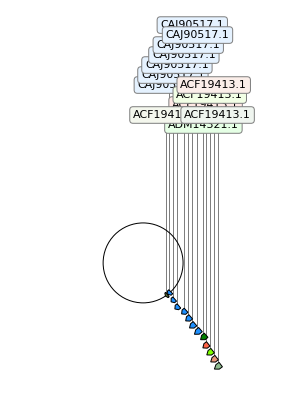

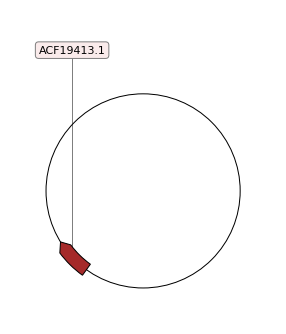

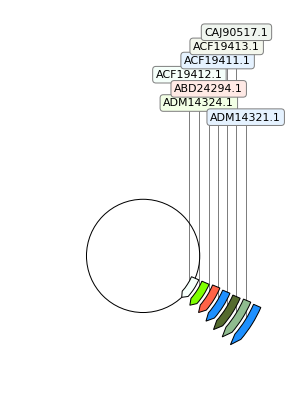

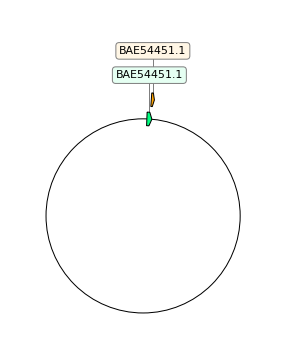

In [63]:
Loxosceles_reclusa = [
    GraphicFeature(start=30377, end=31175, strand=+1, color="#FF6347", label='ACF19413.1'),
    GraphicFeature(start=30629, end=31424, strand=+1, color="#556B2F", label='ACF19413.1'),
    GraphicFeature(start=30689, end=31439, strand=+1, color="#8FBC8F", label='ACF19413.1'),
    GraphicFeature(start=30467, end=31265, strand=+1, color="#7FFF00", label='ACF19413.1'),
    GraphicFeature(start=30590, end=31343, strand=+1, color="#E9967A", label='ACF19413.1'),
    GraphicFeature(start=29876, end=31043, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=30170, end=31289, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=30020, end=31091, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=29972, end=31043, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=29303, end=30521, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=29648, end=30761, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=29810, end=30923, strand=+1, color="#1E90FF", label='CAJ90517.1'),
    GraphicFeature(start=29894, end=30806, strand=+1, color="#008000", label='ADM14321.1')
]    
record = CircularGraphicRecord(sequence_length = 77458 , features = Loxosceles_reclusa)
record.plot(figure_width=5)


Loxosceles_reclusa3 = [
    GraphicFeature(start=13097, end=11856, strand=1, color="#A52A2A", label='ACF19413.1')
]
record3 = CircularGraphicRecord(sequence_length = 19786 , features = Loxosceles_reclusa3)
record3.plot(figure_width=5) 

Loxosceles_reclusa4 = [
    GraphicFeature(start=7066, end=8548, strand=+1, color="#F5FFFA", label='ACF19412.1'),
    GraphicFeature(start=7030, end=8461, strand=+1, color="#FF6347", label='ABD24294.1'),
    GraphicFeature(start=7084, end=8503, strand=+1, color="#556B2F", label='ACF19413.1'),
    GraphicFeature(start=7066, end=8464, strand=+1, color="#8FBC8F", label='CAJ90517.1'),
    GraphicFeature(start=7066, end=8518, strand=+1, color="#7FFF00", label='ADM14324.1'),
    GraphicFeature(start=7066, end=8488, strand=+1, color="#1E90FF", label='ACF19411.1'),
    GraphicFeature(start=7090, end=8452, strand=+1, color="#1E90FF", label='ADM14321.1')
]
record4 = CircularGraphicRecord(sequence_length = 22458 , features = Loxosceles_reclusa4)
record4.plot(figure_width=5)
    
Loxosceles_reclusa2 = [
    GraphicFeature(start=134628, end=135255, strand=+1, color="#5F9EA0", label='ACF19411.1')
]
record32 = CircularGraphicRecord(sequence_length = 179226, features = Loxosceles_reclusa2)
record2.plot(figure_width=5) 


In [ ]:
['vulgar:', 'CAJ90517.1', '0', '391', '.', 'NW_018378775.1', '844135', '850912', '+', '744']
['vulgar:', 'ACF19412.1', '9', '261', '.', 'NW_018382711.1', '45787', '44642', '-', '360']
['vulgar:', 'ADM14324.1', '10', '269', '.', 'NW_018382711.1', '45781', '44675', '-', '232']
['vulgar:', 'ACF19411.1', '9', '247', '.', 'NW_018382711.1', '45787', '44627', '-', '270']
['vulgar:', 'ADM14321.1', '9', '318', '.', 'NW_018382711.1', '45784', '44624', '-', '280']
['vulgar:', 'ACF19411.1', '0', '202', '.', 'NW_018382156.1', '11567577', '11568177', '+', '375']
['vulgar:', 'ABD24294.1', '14', '235', '.', 'NW_018378775.1', '844135', '850831', '+', '502']
['vulgar:', 'ADM14324.1', '0', '271', '.', 'NW_018378775.1', '844135', '844960', '+', '351']
['vulgar:', 'ACF19413.1', '2', '276', '.', 'NW_018378775.1', '844144', '850978', '+', '590']
['vulgar:', 'ADM14321.1', '5', '317', '.', 'NW_018378775.1', '844156', '850882', '+', '444']
['vulgar:', 'ACF19411.1', '0', '261', '.', 'NW_018378775.1', '844135', '850867', '+', '587']
['vulgar:', 'ACF19412.1', '0', '261', '.', 'NW_018378775.1', '844135', '845110', '+', '549']
['vulgar:', 'ADM14324.1', '0', '258', '.', 'NW_018377680.1', '182038', '182953', '+', '400']
['vulgar:', 'ACF19412.1', '0', '261', '.', 'NW_018377680.1', '182038', '182947', '+', '522']
['vulgar:', 'ACF19413.1', '3', '275', '.', 'NW_018377680.1', '182050', '182914', '+', '455']
['vulgar:', 'ACF19411.1', '0', '258', '.', 'NW_018377680.1', '182038', '182953', '+', '567']
['vulgar:', 'AAC38846.1', '53', '871', '.', 'NW_018377636.1', '4861351', '4532406', '-', '1301']
['vulgar:', 'ACF19412.1', '10', '261', '.', 'NW_018376424.1', '305870', '389046', '+', '465']
['vulgar:', 'CAJ90517.1', '9', '394', '.', 'NW_018376424.1', '305867', '382840', '+', '642']
['vulgar:', 'ACF19413.1', '23', '275', '.', 'NW_018376424.1', '305909', '389154', '+', '439']
['vulgar:', 'ACF19411.1', '4', '261', '.', 'NW_018376424.1', '305855', '309583', '+', '460']
['vulgar:', 'ADM14321.1', '2', '317', '.', 'NW_018376424.1', '305849', '389644', '+', '851']
['vulgar:', 'ADM14324.1', '4', '273', '.', 'NW_018376424.1', '305855', '308721', '+', '496']
['vulgar:', 'AAC38846.1', '6', '863', '.', 'NW_018376424.1', '306068', '389244', '+', '1066']
['vulgar:', 'ACF19411.1', '0', '261', '.', 'NW_018374958.1', '102202', '106921', '+', '546']
['vulgar:', 'ABD24294.1', '8', '231', '.', 'NW_018374958.1', '102184', '106822', '+', '497']
['vulgar:', 'ACF19413.1', '0', '275', '.', 'NW_018374958.1', '102202', '106921', '+', '483']
['vulgar:', 'ACF19412.1', '0', '253', '.', 'NW_018374958.1', '102202', '106969', '+', '510']
['vulgar:', 'CAJ90517.1', '0', '366', '.', 'NW_018374958.1', '102202', '106942', '+', '578']
['vulgar:', 'ADM14321.1', '4', '318', '.', 'NW_018374958.1', '102214', '103192', '+', '437']
['vulgar:', 'ACF19413.1', '0', '264', '.', 'NW_018371117.1', '489048', '491188', '+', '424']
['vulgar:', 'ADM14324.1', '0', '265', '.', 'NW_018371117.1', '489048', '491131', '+', '332']
['vulgar:', 'ACF19412.1', '0', '255', '.', 'NW_018371117.1', '489048', '491173', '+', '548']
['vulgar:', 'ACF19411.1', '0', '258', '.', 'NW_018371117.1', '489048', '491167', '+', '591']
['vulgar:', 'ABD24294.1', '9', '235', '.', 'NW_018371117.1', '489033', '491158', '+', '480']
['vulgar:', 'ADM14321.1', '4', '306', '.', 'NW_018371117.1', '489060', '491218', '+', '358']
['vulgar:', 'ADM14324.1', '0', '258', '.', 'NW_018369517.1', '723', '1638', '+', '400']
['vulgar:', 'ACF19411.1', '0', '258', '.', 'NW_018369517.1', '723', '1638', '+', '567']
['vulgar:', 'ACF19413.1', '3', '275', '.', 'NW_018369517.1', '735', '1599', '+', '455']
['vulgar:', 'ACF19412.1', '0', '261', '.', 'NW_018369517.1', '723', '1632', '+', '522']
['vulgar:', 'ACF19413.1', '1', '266', '.', 'NW_018368300.1', '2472243', '2476057', '+', '138']

In [ ]:
Parasteatoda_tepidariorum = [
    GraphicFeature(start=844135, end=850912, strand=+1, color="#F5FFFA", label='CAJ90517.1'),
    GraphicFeature(start=844135, end=850831, strand=+1, color="#FF6347", label='ABD24294.1'),
    GraphicFeature(start=844135, end=844960, strand=+1, color="#556B2F", label='ADM14324.1'),
    GraphicFeature(start=844144, end=850978, strand=+1, color="#8FBC8F", label='ACF19413.1'),
    GraphicFeature(start=844156, end=850882, strand=+1, color="#7FFF00", label='ADM14321.1'),
    GraphicFeature(start=844135, end=850867, strand=+1, color="#1E90FF", label='ACF19411.1'),
    GraphicFeature(start=844135, end=845110, strand=+1, color="#1E90FF", label='ACF19412.1')
]
record = GraphicRecord(sequence_lenght = 3463139, features= Parasteatoda_tepidariorum)
record.plot(figure_width=10)

Parasteatoda_tepidariorum2 = [
    GraphicFeature(start=45787, end=44642, strand=1, color="#F5FFFA", label='ACF19412.1'),
    GraphicFeature(start=45781, end=44675, strand=1, color="#FF6347", label='ADM14324.1'),
    GraphicFeature(start=45787, end=44627, strand=1, color="#556B2F", label='ACF19411.1'),
    GraphicFeature(start=45784, end=44624, strand=1, color="#8FBC8F", label='ADM14321.1')
]
record2 = GraphicRecord(sequence_length =486609, features = Parasteatoda_tepidariorum2)
record2.plot(figure_width = 5)


Parasteatoda_tepidariorum3 = [
    GraphicFeature(start=11567577, end=11568177, strand=+1, color="#20B2AA", label='ACF19411.1')
]
record3 = GraphicRecord(sequence_length = 11651882, features = Parasteatoda_tepidariorum3)
record3.plot(figure_width = 10)

Parasteatoda_tepidariorum4 = [
    GraphicFeature(start=182038, end=182953, strand=+1, color="#F5FFFA", label='ACF19412.1'),
    GraphicFeature(start=182038, end=182947, strand=+1, color="#FFA07A", label='ADM14324.1'),
    GraphicFeature(start=182050, end=182914, strand=+1, color="#556B2F", label='ACF19411.1'),
    GraphicFeature(start=182038, end=182953, strand=+1, color="#00FF7F", label='ADM14321.1')
]
record4 = GraphicRecord(sequence_length=1679954, features = Parasteatoda_tepidariorum4)
record.plot(figure_width = 5)

ValueError: More than one record found in handle

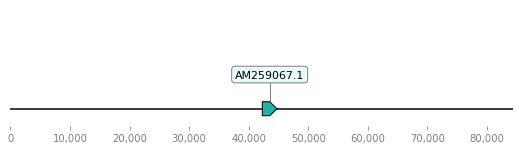

In [10]:
#mRNA !!!!
['vulgar:', 'AM259067.1', '1', '1187', '+', 'KZ629412.1', '42281', '44752', '+', '1314']
anfile="/mnt/students/spiders/annotations/spiders/GCA_000611955.2_Stegodyphus_mimosarum_v1_genomic.gff"
Latrodectus_hesperus = [
    GraphicFeature(start= 42281, end=44752, strand=+1, color="#20B2AA", label="AM259067.1" )
]
record1 = GraphicRecord(sequence_length = 84288, features = Latrodectus_hesperus)
record1.plot(figure_width = 9)

record = SeqIO.read("/mnt/students/spiders/annotations/spiders/GCA_001188405.1_Lrec_1.0_genomic.gbff", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot( with_ruler=False, strand_in_label_threshold=4)


In [ ]:
vulgar: NP_001010828.1 5 343 . GL856950.1 203759 189237 - 826 M 117 351 5 0 2 I 0 13510 3 0 2 M 125 375 G 2 0 M 94 282

['vulgar:', 'NP_001010828.1', '5', '343', '.', 'GL856950.1', '203759', '189237', '-', '826', 'M', '117', '351', '5', '0', '2', 'I', '0', '13510', '3', '0', '2', 'M', '125', '375', 'G', '2', '0', 'M', '94', '282']
vulgar: NP_001010828.1 10 341 . GL856950.1 304121 303122 - 750 M 170 510 G 0 3 M 16 48 G 0 3 M 145 435

['vulgar:', 'NP_001010828.1', '10', '341', '.', 'GL856950.1', '304121', '303122', '-', '750', 'M', '170', '510', 'G', '0', '3', 'M', '16', '48', 'G', '0', '3', 'M', '145', '435']
vulgar: NP_001010828.1 1 344 . GL856950.1 176742 177774 + 1379 M 238 714 G 0 3 M 105 315

['vulgar:', 'NP_001010828.1', '1', '344', '.', 'GL856950.1', '176742', '177774', '+', '1379', 'M', '238', '714', 'G', '0', '3', 'M', '105', '315']
vulgar: NP_001010828.1 0 344 . GL856950.1 143507 144539 + 1369 M 344 1032

['vulgar:', 'NP_001010828.1', '0', '344', '.', 'GL856950.1', '143507', '144539', '+', '1369', 'M', '344', '1032']
vulgar: NP_001010828.1 1 344 . GL856950.1 115901 116930 + 1362 M 343 1029

['vulgar:', 'NP_001010828.1', '1', '344', '.', 'GL856950.1', '115901', '116930', '+', '1362', 'M', '343', '1029']
vulgar: NP_001010828.1 1 344 . GL856950.1 40004 41036 + 1350 M 238 714 G 0 3 M 105 315

['vulgar:', 'NP_001010828.1', '1', '344', '.', 'GL856950.1', '40004', '41036', '+', '1350', 'M', '238', '714', 'G', '0', '3', 'M', '105', '315']
vulgar: NP_001010828.1 0 344 . GL856949.1 1585841 1586873 + 1387 M 344 1032

['vulgar:', 'NP_001010828.1', '0', '344', '.', 'GL856949.1', '1585841', '1586873', '+', '1387', 'M', '344', '1032']
vulgar: NP_001010828.1 10 343 . GL856949.1 1571023 1572010 + 954 M 233 699 G 4 0 M 96 288

['vulgar:', 'NP_001010828.1', '10', '343', '.', 'GL856949.1', '1571023', '1572010', '+', '954', 'M', '233', '699', 'G', '4', '0', 'M', '96', '288']

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5444fabb20>,
 ({GF(TAAR6, 1585841-1586873 (1)): 0, GF(TAAR6, 1571023-1572010 (1)): 0},
  {GF(TAAR6, 1585841-1586873 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(TAAR6, 1571023-1572010 (1)): {'feature_y': 0, 'annotation_y': 2.0}}))

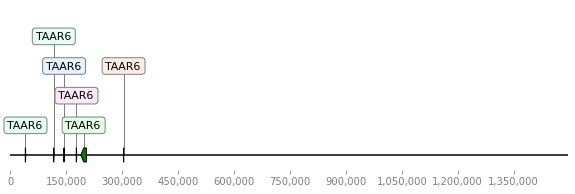

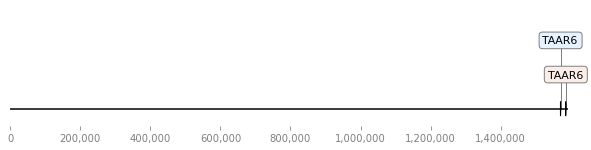

In [64]:
giena = [
    GraphicFeature(start=203759, end=189237, strand=1, color="#008000", label='TAAR6'),
    GraphicFeature(start=304121, end=303122, strand=1, color="#FFA07A", label='TAAR6'),
    GraphicFeature(start=176742, end=177774, strand=+1, color="#C71585", label='TAAR6'),
    GraphicFeature(start=143507, end=144539, strand=+1, color="#1E90FF", label='TAAR6'),
    GraphicFeature(start=115901, end=116930, strand=+1, color="#00FF7F", label='TAAR6'),
    GraphicFeature(start=40004, end=41036, strand=+1, color="#00FF7F", label='TAAR6')
]
record1 = GraphicRecord(sequence_length = 1496740, features = giena)
record1.plot(figure_width=10)

giena1 =  [
    GraphicFeature(start=1585841, end=1586873, strand=+1, color="#E9967A", label='TAAR6'),
    GraphicFeature(start=1571023, end=1572010, strand=+1, color="#1E90FF", label='TAAR6')
]
record2 = GraphicRecord(sequence_length = 1593700, features = giena1)
record2.plot(figure_width = 10)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54461389d0>,
 ({GF(TAAR6, 209401-243875 (1)): 0},
  {GF(TAAR6, 209401-243875 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

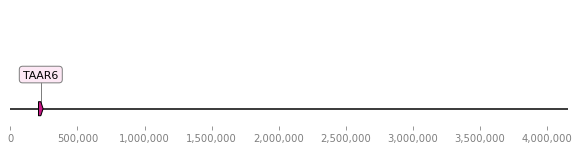

In [21]:
riba_slon = [
    GraphicFeature(start=209401, end=243875, strand=+1, color="#C71585", label="TAAR6")
]
record= GraphicRecord(sequence_length =  4157550, features=riba_slon)
record.plot(figure_width=10)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54463236a0>,
 ({GF(TAAR6, 9539-8522 (1)): 0, GF(TAAR6, 27803-26804 (1)): 0},
  {GF(TAAR6, 9539-8522 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(TAAR6, 27803-26804 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

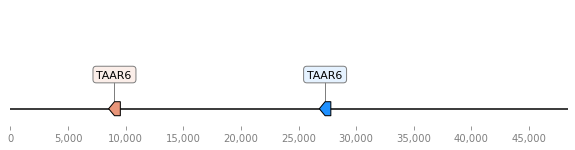

In [26]:
drofa =  [
    GraphicFeature(start=9539, end=8522, strand=1, color="#E9967A", label='TAAR6'),
    GraphicFeature(start=27803, end=26804, strand=1, color="#1E90FF", label='TAAR6')
]
record = GraphicRecord(sequence_length =48412, features=drofa)
record.plot(figure_width=10)

NameError: name 'Circular' is not defined

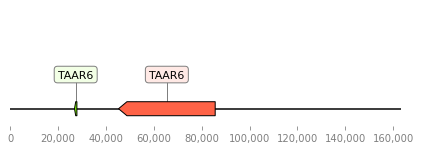

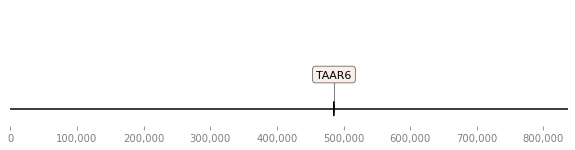

In [61]:
tulen_weddela =  [
    GraphicFeature(start=85612, end=45212, strand=1, color="#FF6347", label='TAAR6'),
    GraphicFeature(start=27803, end=26804, strand=1, color="#7FFF00", label='TAAR6')
]
record= GraphicRecord(sequence_length=163281, features = tulen_weddela)
record.plot(figure_width=7)

tulen_weddela1= [
     GraphicFeature(start=485195, end=486224, strand=+1, color="#E9967A", label='TAAR6')
]
record1= GraphicRecord(sequence_length=837518, features=tulen_weddela1)
record1.plot(figure_width=10)
Circular

(<matplotlib.axes._subplots.AxesSubplot at 0x7f544669b910>,
 ({GF(TAAR6, 657986-656981 (1)): 0},
  {GF(TAAR6, 657986-656981 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

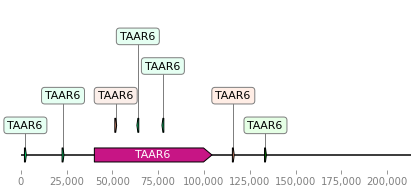

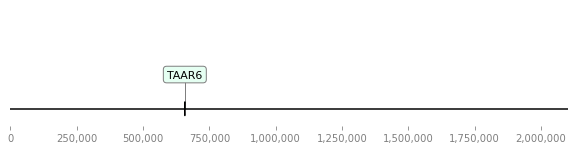

In [39]:
turtle_galapagos = [
    GraphicFeature(start=133107, end=134100, strand=+1, color="#008000", label='TAAR6'),
    GraphicFeature(start=115547, end=116540, strand=+1, color="#FFA07A", label='TAAR6'),
    GraphicFeature(start=40196, end=104385, strand=+1, color="#C71585", label='TAAR6'),
    GraphicFeature(start=51372, end=52352, strand=+1, color="#E9967A", label='TAAR6'),
    GraphicFeature(start=2032, end=3055, strand=+1, color="#00FF7F", label='TAAR6'),
    GraphicFeature(start=22572, end=23595, strand=+1, color="#00FF7F", label='TAAR6'),
    GraphicFeature(start=64433, end=63437, strand=1, color="#00FF7F", label='TAAR6'),
    GraphicFeature(start=78108, end=77116, strand=1, color="#00FF7F", label='TAAR6')
]
record = GraphicRecord(sequence_length = 213229, features=turtle_galapagos)
record.plot(figure_width=7)

turtle_galapagos1= [
    GraphicFeature(start=657986, end=656981, strand=1, color="#00FF7F", label='TAAR6')
]
record1= GraphicRecord(sequence_length=2103139, features=turtle_galapagos1)
record1.plot(figure_width=10)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5445a2a190>,
 ({GF(TAAR6, 24329-338 (1)): 0, GF(TAAR6, 6718-9506 (1)): 1.0},
  {GF(TAAR6, 24329-338 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

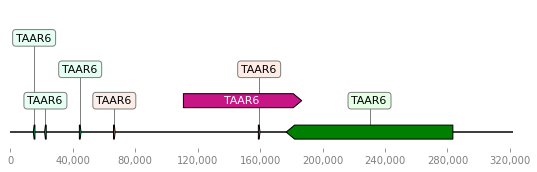

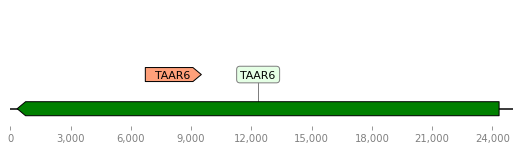

In [43]:
letuchaya_lisica = [
    GraphicFeature(start=283448, end=176670, strand=1, color="#008000", label='TAAR6'),
    GraphicFeature(start=158858, end=159887, strand=+1, color="#FFA07A", label='TAAR6'),
    GraphicFeature(start=110835, end=186624, strand=+1, color="#C71585", label='TAAR6'),
    GraphicFeature(start=66058, end=67087, strand=+1, color="#E9967A", label='TAAR6'),
    GraphicFeature(start=44190, end=45219, strand=+1, color="#00FF7F", label='TAAR6'),
    GraphicFeature(start=15715, end=14686, strand=1, color="#00FF7F", label='TAAR6'),
    GraphicFeature(start=22955, end=21923, strand=1, color="#00FF7F", label='TAAR6')
]
record= GraphicRecord(sequence_length=321708, features=letuchaya_lisica)
record.plot(figure_width=9)

letuchaya_lisica1= [
    GraphicFeature(start=24329, end=338, strand=1, color="#008000", label='TAAR6'),
    GraphicFeature(start=6718, end=9506, strand=+1, color="#FFA07A", label='TAAR6')
]
record1=GraphicRecord(sequence_length=25000, features=letuchaya_lisica1)
record1.plot(figure_width=9)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f54468f8f40>,
 ({GF(TAAR6, 18015-6294 (1)): 0},
  {GF(TAAR6, 18015-6294 (1)): {'feature_y': -1.9270591597385627,
    'annotation_y': 0.45}}))

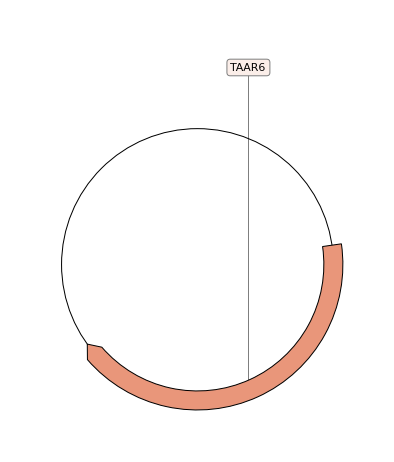

In [53]:
yak= [
    GraphicFeature(start=21383, end=20348, strand=1, color="#008000", label='TAAR6'),
]
record = GraphicRecord(sequence_length=27,696, features=solnechnaya_caplya)
record.plot(figure_width=7)

yak1 = [
    GraphicFeature(start=10218, end=9209, strand=1, color="#FFA07A", label='TAAR6')
]
record1=GraphicRecord(sequence_length=18388, features=solnechnaya_caplya1)
record1.plot(figure_width=7)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f544581d5b0>,
 ({GF(TAAR6, 4552-3553 (1)): 0},
  {GF(TAAR6, 4552-3553 (1)): {'feature_y': -0.9985476214868821,
    'annotation_y': 0.45}}))

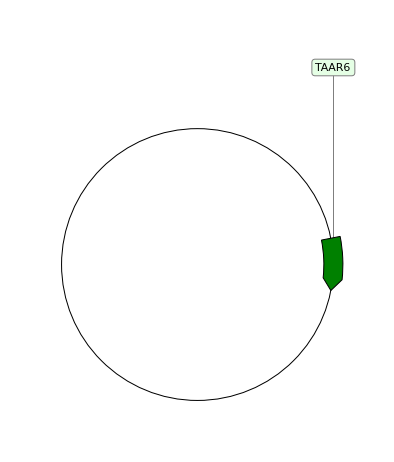

In [51]:
kudryaviy_pelican= [
    GraphicFeature(start=4552, end=3553, strand=1, color="#008000", label='TAAR6'),
]
record = CircularGraphicRecord(sequence_length=16223, features=kudryaviy_pelican)
record.plot(figure_width=7)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f544510de20>,
 ({GF(TAAR6, 189463-211065 (1)): 0,
   GF(TAAR6, 173395-174429 (1)): 0,
   GF(TAAR6, 238529-237524 (1)): 0,
   GF(TAAR6, 300235-299215 (1)): 0,
   GF(TAAR6, 251453-250447 (1)): 0},
  {GF(TAAR6, 189463-211065 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(TAAR6, 173395-174429 (1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(TAAR6, 300235-299215 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(TAAR6, 251453-250447 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(TAAR6, 238529-237524 (1)): {'feature_y': 0, 'annotation_y': 2.0}}))

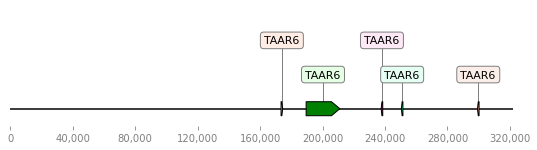

In [59]:
cheriy_rinopitek = [
    GraphicFeature(start=189463, end=211065, strand=1, color="#008000", label='TAAR6'),
    GraphicFeature(start=173395, end=174429, strand=+1, color="#FFA07A", label='TAAR6'),
    GraphicFeature(start=238529, end=237524, strand=+1, color="#C71585", label='TAAR6'),
    GraphicFeature(start=300235, end=299215, strand=+1, color="#E9967A", label='TAAR6'),
    GraphicFeature(start=251453, end=250447, strand=+1, color="#00FF7F", label='TAAR6')

]
record= GraphicRecord(sequence_length=321708, features=cheriy_rinopitek)
record.plot(figure_width=9)